Projekt dotyczy analizy danych zawartych w zbiorze dotyczącym osiągnięć uczniów szkół średnich z dwóch portugalskich szkół.

Dane zawierają oceny uczniów, cechy demograficzne, społeczne i szkolne.

Używam bibliotek:

In [139]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

Pobieram dane:

In [122]:
student_performance = fetch_ucirepo(id=320)

In [123]:
columns_to_hot_encode = []
for col in student_performance.data.features:
    if (student_performance.data.features[col].dtype == 'object'):
        columns_to_hot_encode.append(col)
        
features = pd.get_dummies(student_performance.data.features, columns=columns_to_hot_encode)

In [124]:
student_performance = fetch_ucirepo(id=320)
X =features
y = student_performance.data.targets 

Tworzę macierz korelacji i wybieram najważniejsze parametry:

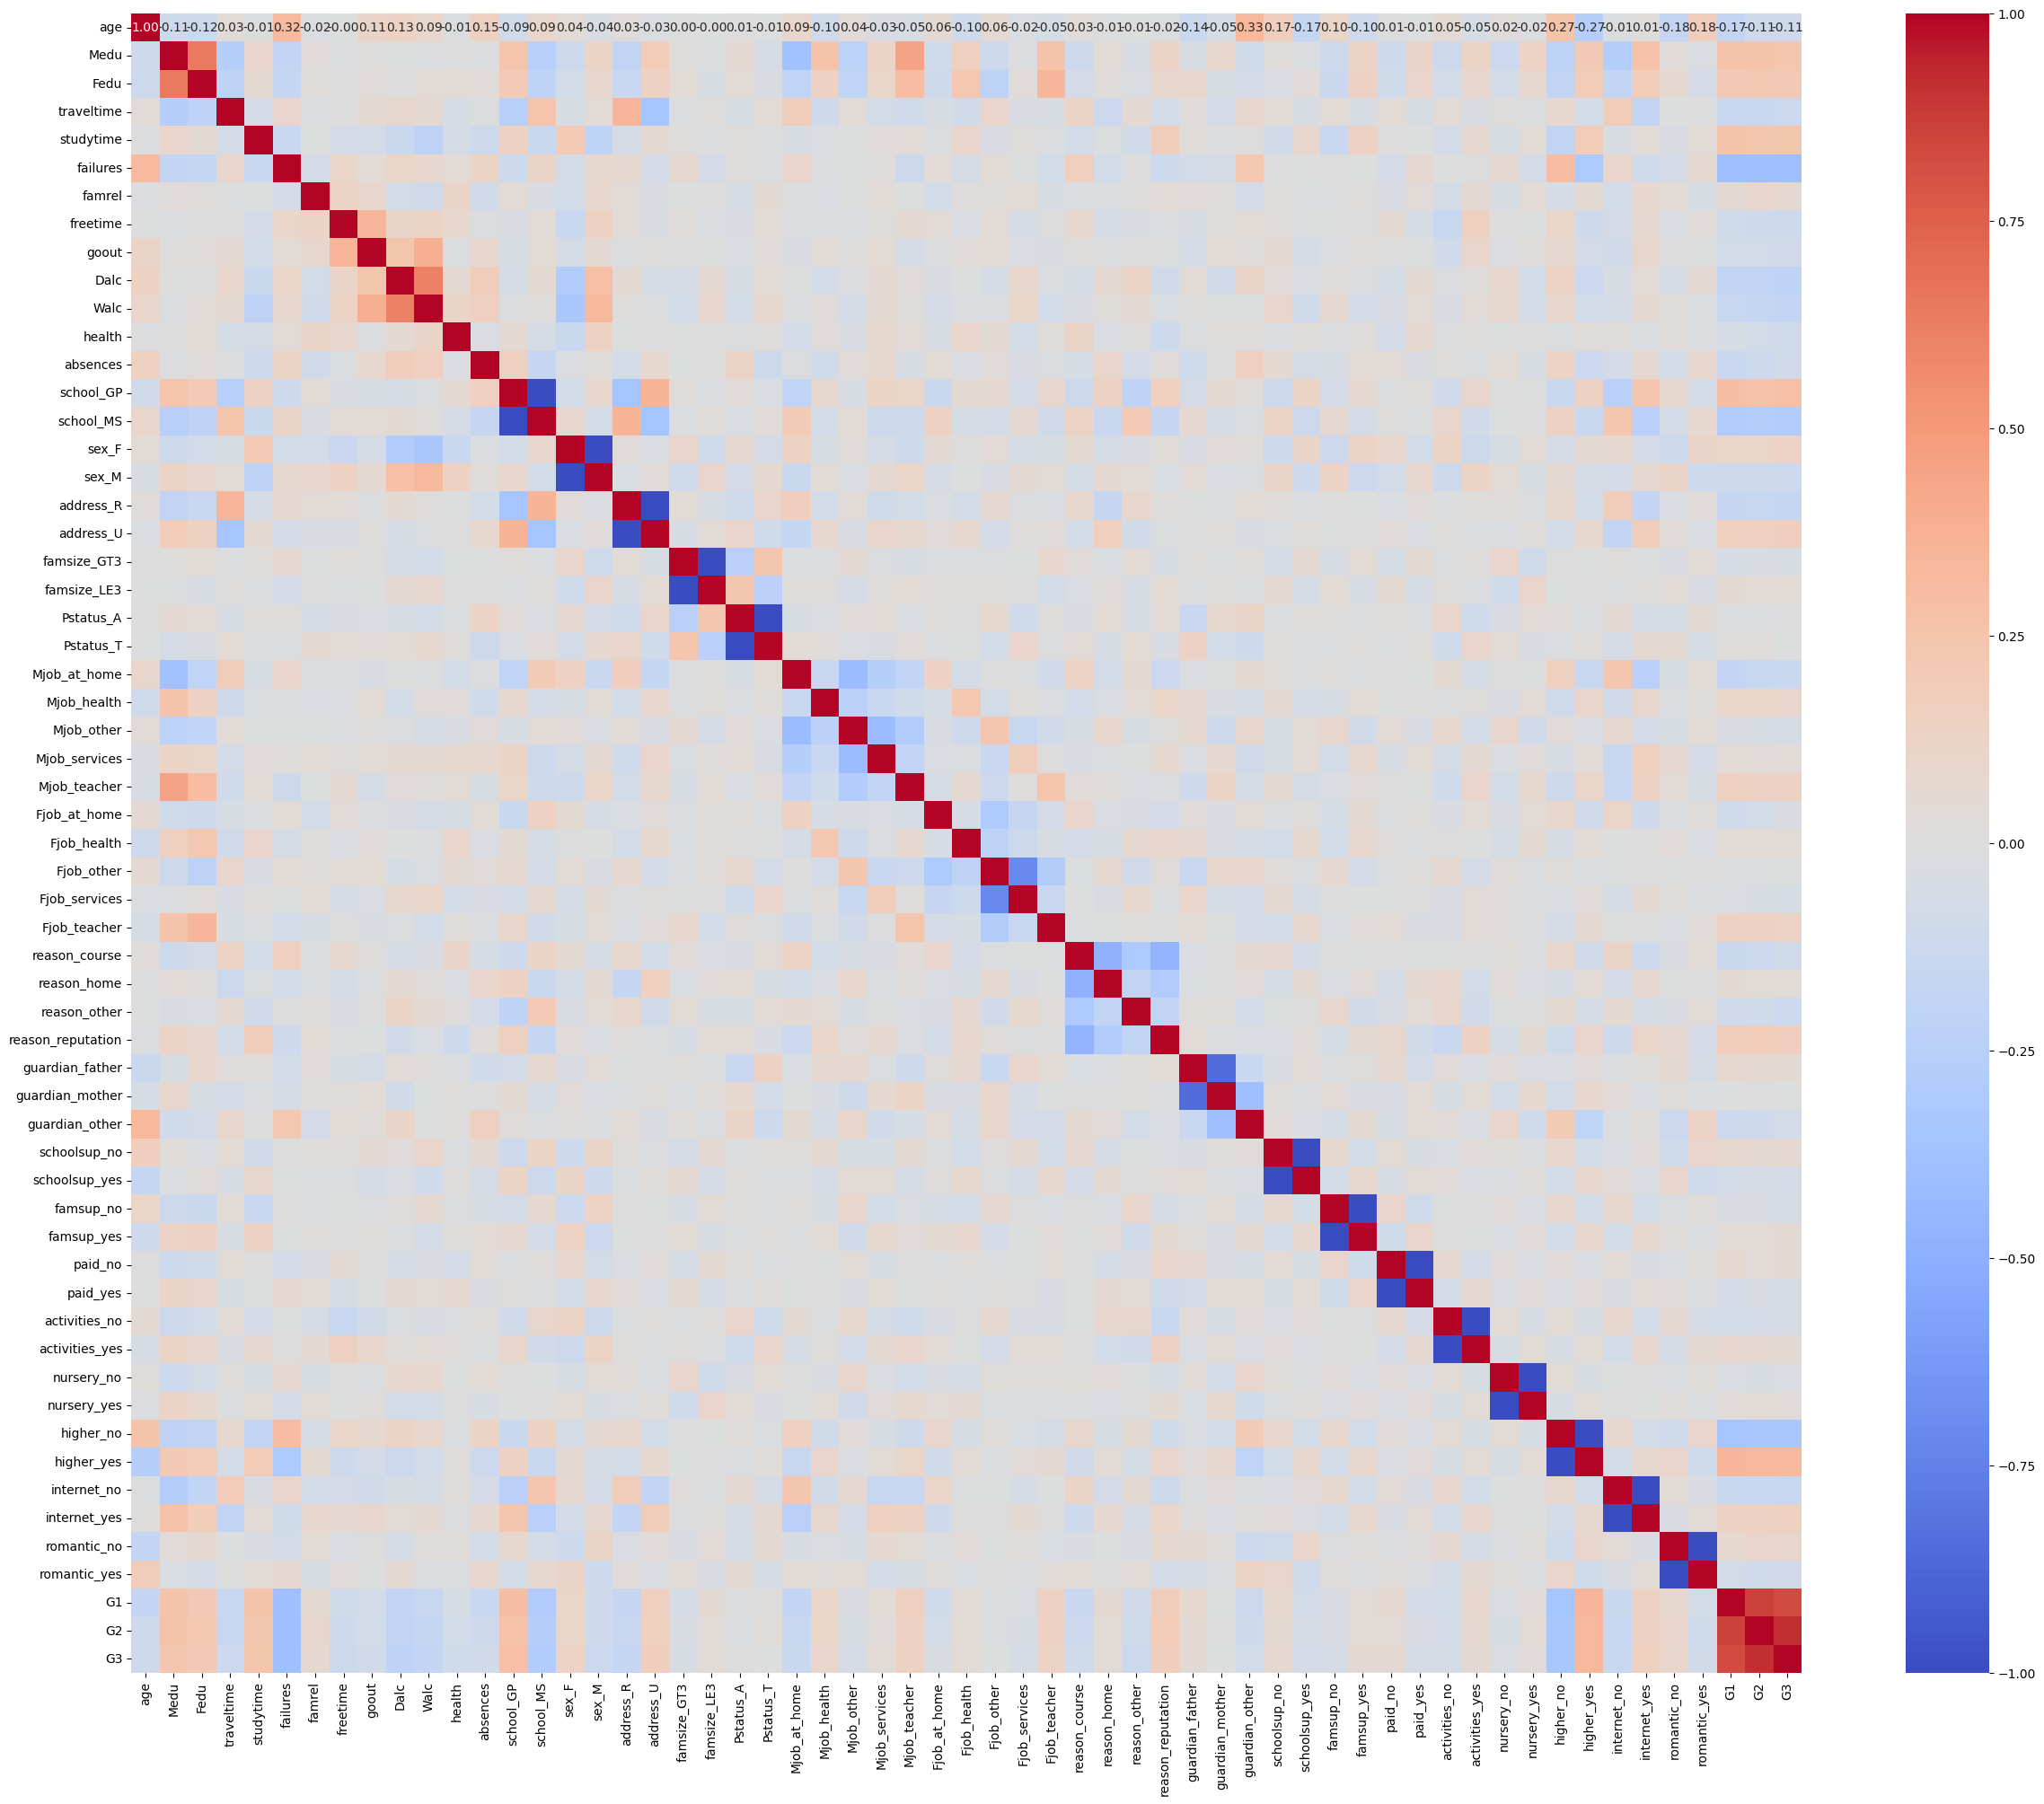

In [125]:
C = pd.concat([X, student_performance.data.targets], axis=1)
correlation_matrix = C.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Wnioski:  
Z otrzymanej macierzy korelacji można wywnioskować, że największy wpływ na wyniki uczniów mają:
- Wykształcenie matki (Medu).
- Wykształcenie ojca (Fedu).
- Czas nauki (studytime).
- Przynależność ucznia do szkoły "Gabriel Pereira" (school_GP).
- Czy uczeń chce uzyskać wykształcenie wyższe (higher_yes).
- Czy uczeń nie zaliczył przedmiotów (failures).
- Wyniki w pozostałych latach nauki w szkole średniej (G1, G2, G3).

Dzielę dane na testowe i treningowe. Uwzględniam tylko te które mają największy wpływ na wyniki w nauce:

In [126]:
important_features = features[['Medu', 'Fedu', 'studytime', 'school_GP', 'higher_yes', "failures"]]
X_train, X_test, y_train, y_test = train_test_split(important_features, y, test_size=0.3, random_state=49)

Tworzę trzy drzewa decyzyjne, oddzielnie dla wyników z pierwszego, drugiego i trzeciego roku: 

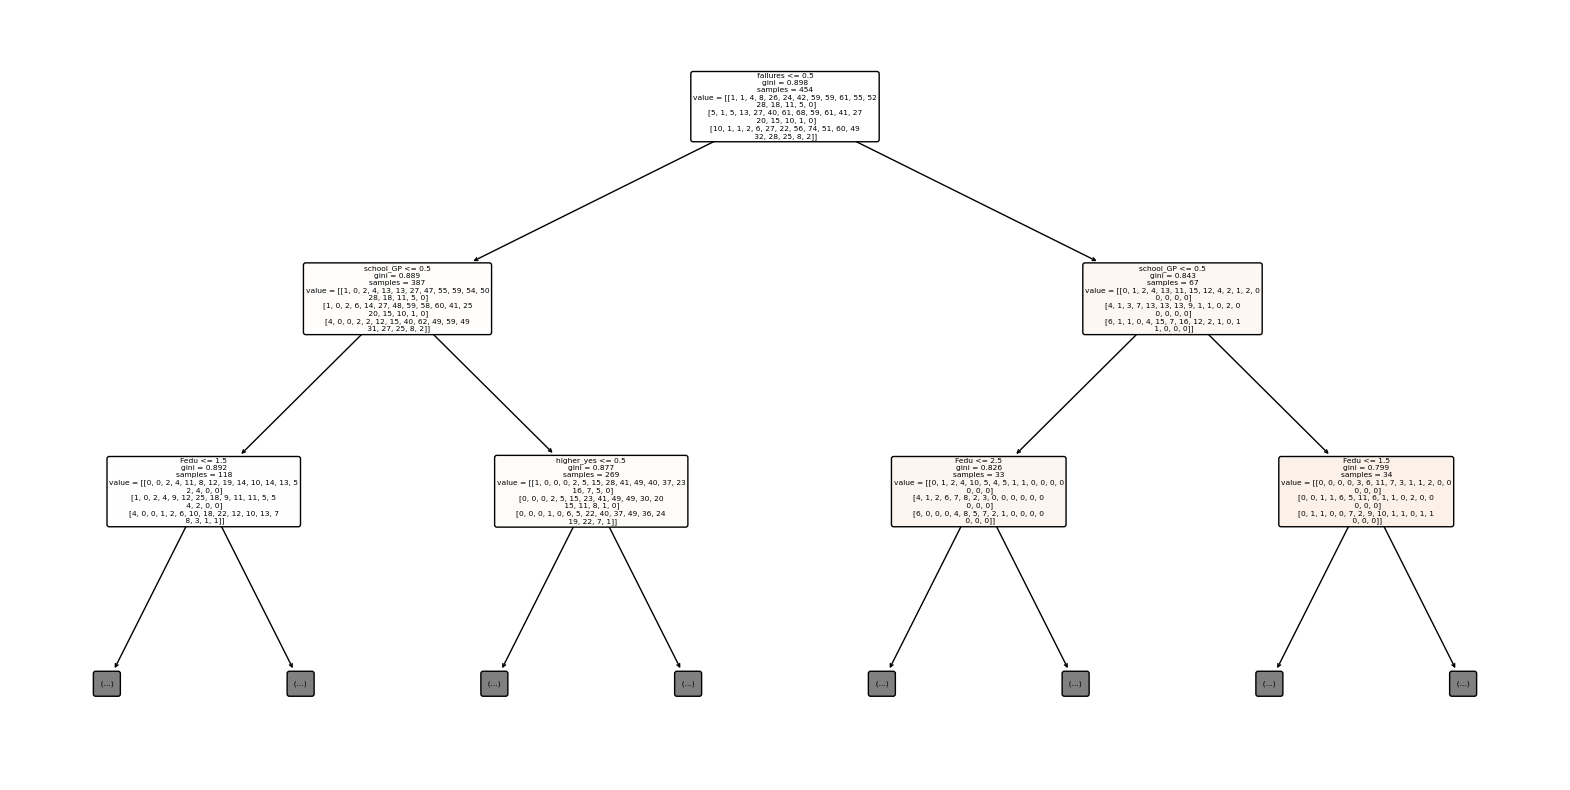

In [127]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          filled=True, 
          rounded=True, 
          class_names=True, 
          feature_names=X_train.columns, 
          max_depth=2)
plt.show()

Drzewo decyzyjne dla wyników pierwszego roku (G1):

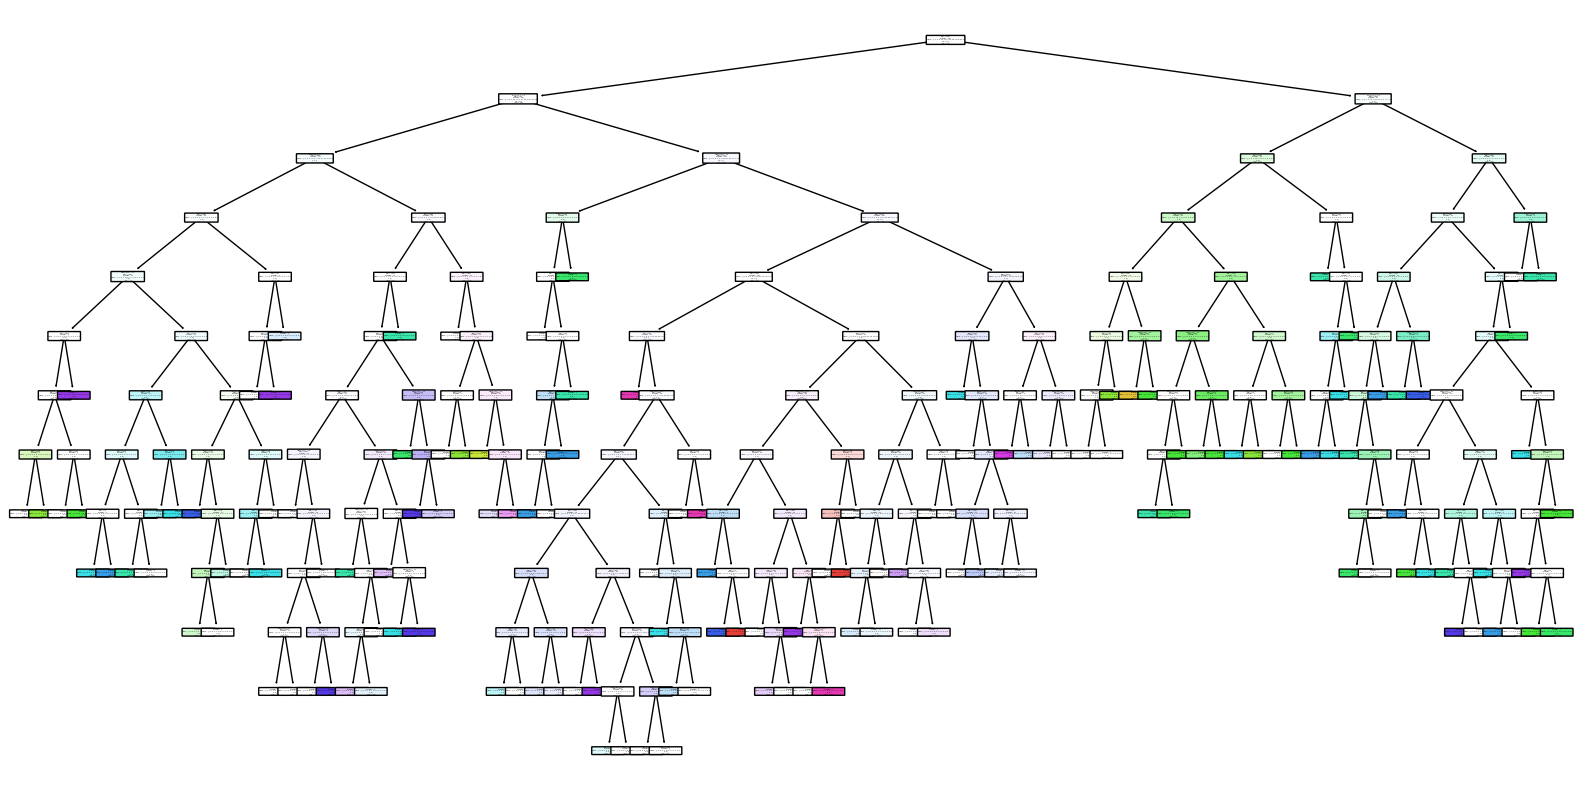

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.04      0.14      0.06         7
           8       0.12      0.11      0.12        18
           9       0.27      0.17      0.21        23
          10       0.11      0.11      0.11        36
          11       0.18      0.16      0.17        32
          12       0.21      0.29      0.24        21
          13       0.20      0.12      0.15        17
          14       0.21      0.16      0.18        19
          15       0.20      0.14      0.17         7
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1

    accuracy                           0.14       195
   macro avg       0.10   

/home/mateusz/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mateusz/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mateusz/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
y_G1 = student_performance.data.targets['G1']
X_train, X_test, y_train, y_test = train_test_split(important_features, y_G1, test_size=0.3, random_state=49)
dt_classifier = DecisionTreeClassifier(random_state=random.randint(0,111))
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          filled=True, 
          rounded=True, 
          class_names=True, 
          feature_names=X_train.columns, 
          )
plt.show()
target_pred = dt_classifier.predict(X_test)
print(classification_report(y_test, target_pred))


0       0
1       9
2      12
3      14
4      11
       ..
644    10
645    15
646    11
647    10
648    10
Name: G1, Length: 649, dtype: int64

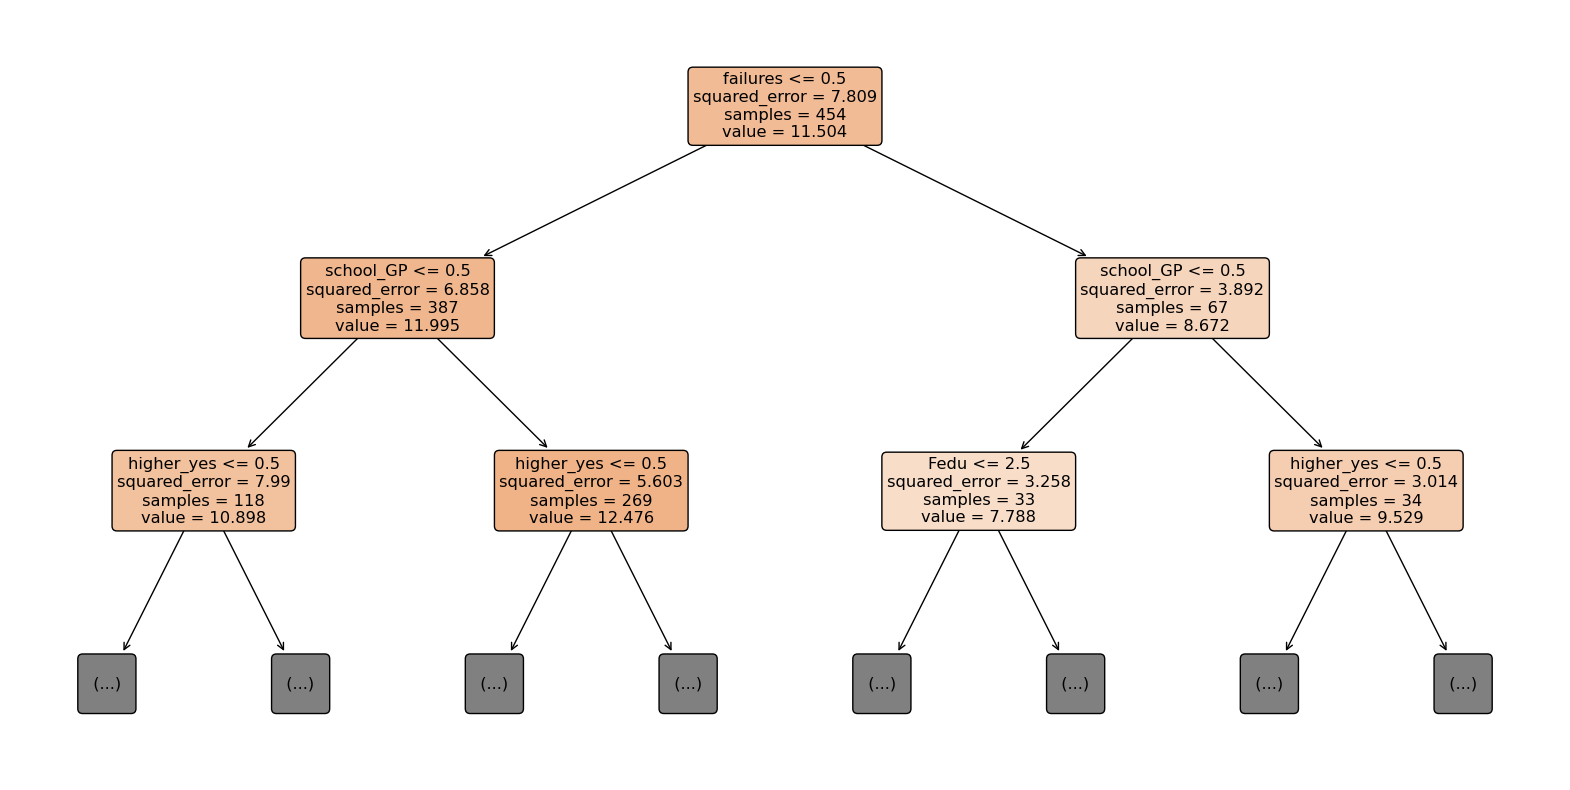

Mean Squared Error for G1 regression: 7.657274901605203


In [140]:
y_G1 = student_performance.data.targets['G1']
X_train, X_test, y_train, y_test = train_test_split(important_features, y_G1, test_size=0.3, random_state=49)

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=random.randint(0,111))

# Fit the regressor to the training data
dt_regressor.fit(X_train, y_train)

# Visualize the decision tree (adjust parameters as needed)
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, rounded=True, feature_names=X_train.columns, max_depth=2)
plt.show()

# Make predictions on the test set
target_pred = dt_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, target_pred)
print(f"Mean Squared Error for G1 regression: {mse}")